In [33]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [34]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [35]:
data.shape

(6197, 100, 100, 1)

In [36]:
target.shape

(6197, 3)

In [37]:
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(3,activation='relu'))

In [38]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,)

ModelCheckpoint: This callback in Keras is used to save the model's weights at certain intervals (in this case, after each epoch) during training. It's configured to monitor the validation loss and save only the best model (one with the lowest validation loss). The filename for the saved models will be in the format 'model-(epoch:03d).model', where (epoch:03d) will be replaced by the epoch number.
verbose: This parameter determines the verbosity mode. It's an integer, either 0, 1, or 2. The values represent different levels of verbosity during model training.
verbose =0: Silent mode. The training progress won't be displayed. verbose=1: Default mode. It displays a progress bar for each epoch during training. verbose=2: It shows one line per epoch during training, like Epoch 1/5 - loss: 0.35 - val_loss: 0.28. mode: This parameter defines the criteria to decide whether to save the model based on the monitored quantity (monitor). It accepts strings such as 'auto', 'min", 'max. This parameter works along with save_best_only.
mode='auto*: The mode is automatically inferred based on the monitored quantity. For instance, if monitor= 'val_loss', then mode='auto' will save the model with the lowest validation loss. mode='min: Save the model when the monitored quantity (e.g., validation loss) is minimized. mode='max: Save the model when the monitored quantity (e.g, validation accuracy) is maximized.



In [40]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val-loss',verbose=0,save_best_only=True,mode='auto')

history = model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/5
117/117 [==============================] - 143s 1s/step - loss: nan - accuracy: 0.0126 - val_loss: nan - val_accuracy: 0.0054
Epoch 2/5
117/117 [==============================] - 143s 1s/step - loss: nan - accuracy: 0.0078 - val_loss: nan - val_accuracy: 0.0054
Epoch 3/5
117/117 [==============================] - 146s 1s/step - loss: nan - accuracy: 0.0078 - val_loss: nan - val_accuracy: 0.0054
Epoch 4/5
117/117 [==============================] - 151s 1s/step - loss: nan - accuracy: 0.0078 - val_loss: nan - val_accuracy: 0.0054
Epoch 5/5
117/117 [==============================] - 152s 1s/step - loss: nan - accuracy: 0.0078 - val_loss: nan - val_accuracy: 0.0054


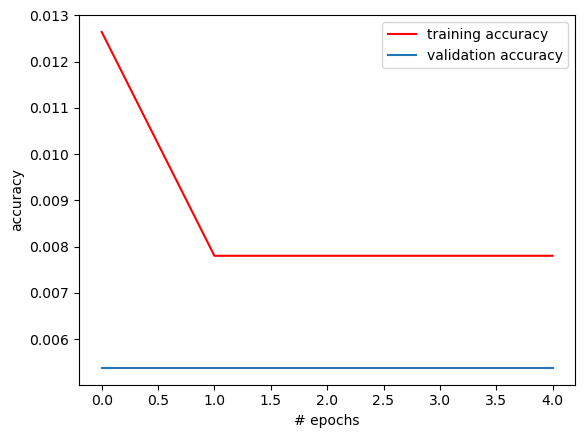

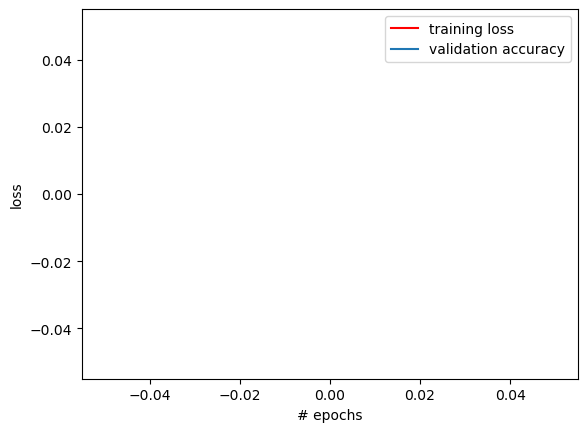

In [46]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')

plt.xlabel('# epochs')
plt.ylabel('accuracy')

plt.legend()
plt.show()

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation accuracy')

plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [48]:
model.save('mask_modle.h5')

/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
